# Initialize file and import necessary library

In [11]:
# Install FredAPI, upgrade nbformat, matplotlib, plotly
%pip install fredapi > /dev/null
%pip install --upgrade nbformat > /dev/null
%pip install matplotlib plotly==5.19.0 > /dev/null

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [12]:
# Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred
import config

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
fred_key = config.fred_api

In [13]:
# Create Fred object
myfred = Fred(api_key=fred_key)

# Search for Economic Data

### 1. San Diego Home Price Index

In [28]:
# Search for San Diego Home Price data and sort by popularity
sd_search = myfred.search('San Diego Home Price', order_by='popularity').T
sd_search.head(5)

series id,SDXRSA,ATNHPIUS41740Q,SDXRHTNSA,SDXRNSA,ATNHPIUS06073A,CUUSA424SAH,SDXRHTSA,SDXRMTSA,CUUSA424SAF11,SDXRLTNSA,SDXRLTSA,CUUSA424SEFV,SDXRMTNSA,SDXRPSNSA
id,SDXRSA,ATNHPIUS41740Q,SDXRHTNSA,SDXRNSA,ATNHPIUS06073A,CUUSA424SAH,SDXRHTSA,SDXRMTSA,CUUSA424SAF11,SDXRLTNSA,SDXRLTSA,CUUSA424SEFV,SDXRMTNSA,SDXRPSNSA
realtime_start,2024-03-10 00:00:00,2024-03-10 00:00:00,2024-03-10 00:00:00,2024-03-10 00:00:00,2024-03-10 00:00:00,2024-03-10 00:00:00,2024-03-10 00:00:00,2024-03-10 00:00:00,2024-03-10 00:00:00,2024-03-10 00:00:00,2024-03-10 00:00:00,2024-03-10 00:00:00,2024-03-10 00:00:00,2024-03-10 00:00:00
realtime_end,2024-03-10 00:00:00,2024-03-10 00:00:00,2024-03-10 00:00:00,2024-03-10 00:00:00,2024-03-10 00:00:00,2024-03-10 00:00:00,2024-03-10 00:00:00,2024-03-10 00:00:00,2024-03-10 00:00:00,2024-03-10 00:00:00,2024-03-10 00:00:00,2024-03-10 00:00:00,2024-03-10 00:00:00,2024-03-10 00:00:00
title,S&P CoreLogic Case-Shiller CA-San Diego Home P...,All-Transactions House Price Index for San Die...,"Home Price Index (High Tier) for San Diego, Ca...",S&P CoreLogic Case-Shiller CA-San Diego Home P...,All-Transactions House Price Index for San Die...,Consumer Price Index for All Urban Consumers: ...,"Home Price Index (High Tier) for San Diego, Ca...","Home Price Index (Middle Tier) for San Diego, ...",Consumer Price Index for All Urban Consumers: ...,"Home Price Index (Low Tier) for San Diego, Cal...","Home Price Index (Low Tier) for San Diego, Cal...",Consumer Price Index for All Urban Consumers: ...,"Home Price Index (Middle Tier) for San Diego, ...","Home Price Sales Pair Counts for San Diego, Ca..."
observation_start,1987-01-01 00:00:00,1975-10-01 00:00:00,1989-01-01 00:00:00,1987-01-01 00:00:00,1975-01-01 00:00:00,1984-01-01 00:00:00,1989-01-01 00:00:00,1989-01-01 00:00:00,1984-01-01 00:00:00,1989-01-01 00:00:00,1989-01-01 00:00:00,1984-01-01 00:00:00,1989-01-01 00:00:00,1987-01-01 00:00:00


In [23]:
# Pick the most popular data series
sd_home_price = myfred.get_series('SDXRSA')

<Axes: title={'center': 'San Diego Home Price Index'}>

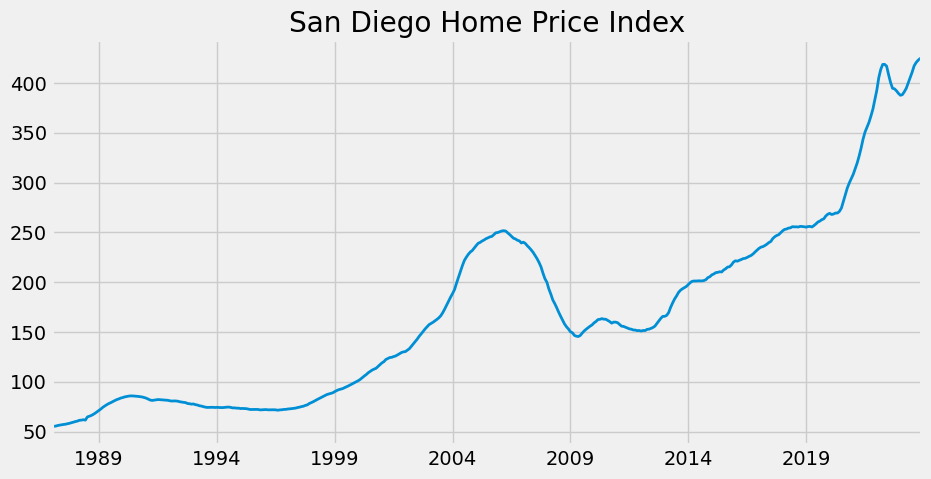

In [27]:
# Plot it
sd_home_price.plot(figsize=(10,5), title='San Diego Home Price Index', lw=2)

# Search and join multiple data set

### 1. Unemployment Rate Across The United States

In [40]:
# Search and filter unemployment rate across the US, filter monthly, seasonally adjusted and in percent
unemp_search = myfred.search('Unemployed Rate in State', filter=('frequency', 'Monthly'))
unemp_search = unemp_search.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_search = unemp_search.loc[unemp_search.title.str.startswith('Unemployment Rate in ')].copy()

In [52]:
# Filter data by States in the United States
unemployed_states_df = unemp_search.loc[unemp_search.id.str.endswith('UR')][:-5].copy()

In [53]:
# Extract State name from dataset
id_to_state = unemployed_states_df.title.str.replace('Unemployment Rate in ', '').to_dict()

In [71]:
# Concatenate all filterd dataset
all_results_unemp = []
for myid in unemployed_states_df.index:
    result = myfred.get_series(myid)
    result = result.to_frame(name=myid)
    all_results_unemp.append(result)

unemployment_states = pd.concat(all_results_unemp, axis=1)


In [84]:
# Find and replace null values
unemployment_states[unemployment_states.isnull().any(axis=1)]
prur_median = unemployment_states.PRUR.median()
unemployment_states.PRUR = unemployment_states.PRUR.fillna(prur_median)
unemployment_states.isnull().sum().sum()

0

In [91]:
# Change columns state name
unemployment_states = unemployment_states.rename(columns=id_to_state).copy()

In [92]:
# Graph unemployment rate with px
px.line(unemployment_states)

### 2. Unemployment Rate on April 2020 across the United States

<Axes: title={'center': 'Unemployment Rate by State, April 2020'}>

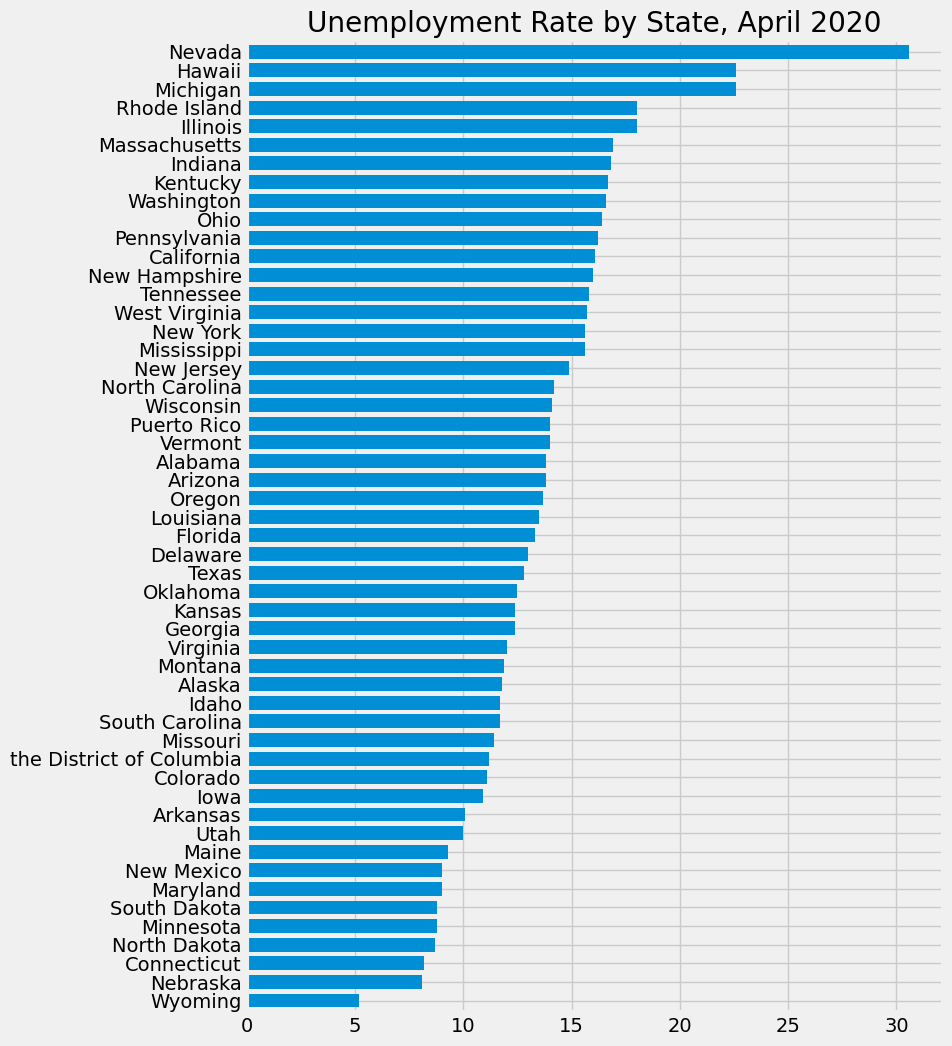

In [146]:
unemployment_states.loc['2020-04-01'] \
    .sort_values(ascending=True) \
    .plot(kind='barh',
          figsize=(8,12),
          title='Unemployment Rate by State, April 2020',
          width= 0.75)

### 3. Employment Participation Rate Across The United States

In [102]:
# Search and filter employment participation rate across the US, filter monthly, seasonally adjusted and in percent
emp_search = myfred.search('Employment Participation Rate in State', filter=('frequency', 'Monthly'))
emp_search = emp_search.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
emp_search = emp_search.loc[emp_search.title.str.startswith('Labor Force Participation Rate for ')].copy()

In [110]:
# Filter data by States in the United States
emp_search.index

Index(['LBSSA06', 'LBSSA01', 'LBSSA36', 'LBSSA26', 'LBSSA28', 'LBSSA48',
       'LBSSA12', 'LBSSA21', 'LBSSA39', 'LBSSA55', 'LBSSA42', 'LBSSA25',
       'LBSSA27', 'LBSSA24', 'LBSSA54', 'LBSSA47', 'LBSSA23', 'LBSSA17',
       'LBSSA37', 'LBSSA13', 'LBSSA22', 'LBSSA45', 'LBSSA08', 'LBSSA49',
       'LBSSA51', 'LBSSA18', 'LBSSA29', 'LBSSA34', 'LBSSA19', 'LBSSA02',
       'LBSSA53', 'LBSSA04', 'LBSSA35', 'LBSSA16', 'LBSSA05', 'LBSSA40',
       'LBSSA31', 'LBSSA15', 'LBSSA32', 'LBSSA30', 'LBSSA41', 'LBSSA33',
       'LBSSA50', 'LBSSA09', 'LBSSA38', 'LBSSA46', 'LBSSA20', 'LBSSA44',
       'LBSSA11', 'LBSSA10', 'LBSSA56'],
      dtype='object', name='series id')

In [118]:
# Extract State name from dataset
id_to_state_emp = emp_search.title.str.replace('Labor Force Participation Rate for ', '').to_dict()

In [108]:
# Concatenate all filterd dataset
all_results_emp = []
for myid in emp_search.index:
    result = myfred.get_series(myid)
    result = result.to_frame(name=myid)
    all_results_emp.append(result)

employment_states = pd.concat(all_results_emp, axis=1)

In [111]:
# Find and replace null values
employment_states.isnull().sum().sum()

0

In [122]:
# Change columns state name
employment_states = employment_states.rename(columns=id_to_state_emp).copy()

In [123]:
# Graph unemployment rate with px
px.line(employment_states)